# Question 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

In [2]:
df = pd.read_csv('weather.csv')
df['Ftemp'] = (df['Ktemp']- 273.15) * (9/5) + 32
df['time'] = pd.to_datetime(df['time'])


In [3]:
df.head()

,time,longitude,latitude,Ktemp,Ftemp
0,1950-01-01 09:00:00,286,40.75,274.39734,34.245212
1,1950-01-02 09:00:00,286,40.75,277.07593,39.066674
2,1950-01-03 09:00:00,286,40.75,280.80090,45.771620
3,1950-01-04 09:00:00,286,40.75,287.14010,57.182180
4,1950-01-05 09:00:00,286,40.75,285.65262,54.504716


## Part A

I am including this cell multiple times (set to various years) as proof to the grader that the interactive slider works.

In [4]:
def plot_year_weather(year):
    df_year = df[df['time'].dt.year == year]
    # group by month for avg temp
    monthly_avg = df_year.groupby(df_year['time'].dt.month)['Ftemp'].mean()
    
    plt.figure(figsize=(10, 5))
    plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='-')
    plt.xlabel('Month')
    plt.ylabel('Average Temperature (F)')
    plt.title(f'Average Monthly Temperature for {year}')
    plt.xticks(range(1, 13))
    plt.grid(True)
    plt.show()

# slider
year_slider = IntSlider(
    value=df['time'].dt.year.min(),
    min=df['time'].dt.year.min(),
    max=df['time'].dt.year.max(),
    step=1,
    description='Year:',
    continuous_update=False
)

interact(plot_year_weather, year=year_slider)


interactive(children=(IntSlider(value=1950, continuous_update=False, description='Year:', max=2021, min=1950),…

<function __main__.plot_year_weather(year)>

In [5]:
def plot_year_weather(year):
    df_year = df[df['time'].dt.year == year]
    # group by month for avg temp
    monthly_avg = df_year.groupby(df_year['time'].dt.month)['Ftemp'].mean()
    
    plt.figure(figsize=(10, 5))
    plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='-')
    plt.xlabel('Month')
    plt.ylabel('Average Temperature (F)')
    plt.title(f'Average Monthly Temperature for {year}')
    plt.xticks(range(1, 13))
    plt.grid(True)
    plt.show()

# slider
year_slider = IntSlider(
    value=df['time'].dt.year.min(),
    min=df['time'].dt.year.min(),
    max=df['time'].dt.year.max(),
    step=1,
    description='Year:',
    continuous_update=False
)

interact(plot_year_weather, year=year_slider)


interactive(children=(IntSlider(value=1950, continuous_update=False, description='Year:', max=2021, min=1950),…

<function __main__.plot_year_weather(year)>

In [6]:
def plot_year_weather(year):
    df_year = df[df['time'].dt.year == year]
    # group by month for avg temp
    monthly_avg = df_year.groupby(df_year['time'].dt.month)['Ftemp'].mean()
    
    plt.figure(figsize=(10, 5))
    plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='-')
    plt.xlabel('Month')
    plt.ylabel('Average Temperature (F)')
    plt.title(f'Average Monthly Temperature for {year}')
    plt.xticks(range(1, 13))
    plt.grid(True)
    plt.show()

# slider
year_slider = IntSlider(
    value=df['time'].dt.year.min(),
    min=df['time'].dt.year.min(),
    max=df['time'].dt.year.max(),
    step=1,
    description='Year:',
    continuous_update=False
)

interact(plot_year_weather, year=year_slider)


interactive(children=(IntSlider(value=1950, continuous_update=False, description='Year:', max=2021, min=1950),…

<function __main__.plot_year_weather(year)>

## Part B

In [7]:
df['year'] = df['time'].dt.year
yearly_avg = df.groupby('year')['Ftemp'].mean()
print(yearly_avg[yearly_avg > 55].index.min())

1953


## Part C

In [8]:
crash_df = pd.read_csv('crashes.csv')
crash_df['CRASH DATE'] = pd.to_datetime(crash_df['CRASH DATE'], format='%m/%d/%Y')  # Adjust format if needed


/Users/matthewmaitland/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
min_year_crash = crash_df['CRASH DATE'].dt.year.min()
max_year_crash = crash_df['CRASH DATE'].dt.year.max()

Similar to the first part, I have included multiple stages of the slider in the printed output to prove that the slider works interactively.

In [10]:
def plot_year_weather_crashes(year):
    # filter weather for year /calculate avg temp per month
    df_year = df[df['time'].dt.year == year]
    monthly_avg = df_year.groupby(df_year['time'].dt.month)['Ftemp'].mean()

    # filter crash data for year and count crashes per month
    crash_year = crash_df[crash_df['CRASH DATE'].dt.year == year]
    monthly_crashes = crash_year.groupby(crash_df['CRASH DATE'].dt.month).size()
    
    # dual-axis plot
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # first axis
    color = 'tab:red'
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Average Temperature (°F)', color=color)
    ax1.plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='-', color=color, label='Avg Temperature')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xticks(range(1, 13))
    
    # second axis
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Number of Crashes', color=color)
    ax2.plot(monthly_crashes.index, monthly_crashes.values, marker='s', linestyle='--', color=color, label='Crashes')
    ax2.tick_params(axis='y', labelcolor=color)
    
    plt.title(f'Average Monthly Temperature and Crash Count for {year}')
    fig.tight_layout()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# slider
year_slider = IntSlider(
    value=df['time'].dt.year.min(),
    min=min_year_crash,
    max=df['time'].dt.year.max(),
    step=1,
    description='Year:',
    continuous_update=False
)

interact(plot_year_weather_crashes, year=year_slider)


interactive(children=(IntSlider(value=2012, continuous_update=False, description='Year:', max=2021, min=2012),…

<function __main__.plot_year_weather_crashes(year)>

In [13]:
year_slider2 = IntSlider(
    value=df['time'].dt.year.min(),
    min=min_year_crash,
    max=df['time'].dt.year.max(),
    step=1,
    description='Year:',
    continuous_update=False
)

interact(plot_year_weather_crashes, year=year_slider2)

interactive(children=(IntSlider(value=2012, continuous_update=False, description='Year:', max=2021, min=2012),…

<function __main__.plot_year_weather_crashes(year)>

I chose to overlay the quantity of car crashes in NYC per month on top of the temperature graph from the first part. I thought it would be interesting to see if there was any correlation. I saw some correlation, so I decided to plot temperature vs. car crashes below, ignoring the time dimension, which showed a very slight positive correlation.

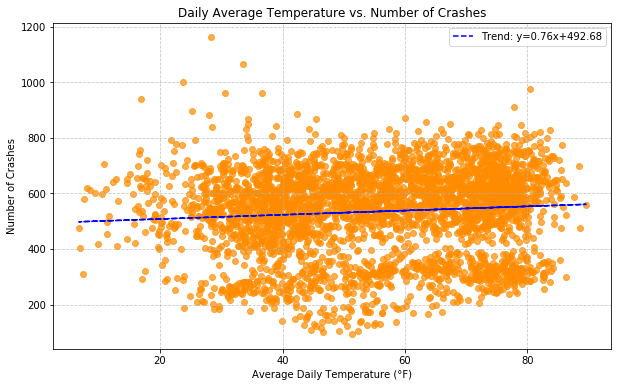

In [9]:
df['date'] = df['time'].dt.date
daily_temp = df.groupby('date')['Ftemp'].mean().reset_index()


crash_df['date'] = crash_df['CRASH DATE'].dt.date
daily_crashes = crash_df.groupby('date').size().reset_index(name='crash_count')


merged_df = pd.merge(daily_temp, daily_crashes, on='date', how='inner')


plt.figure(figsize=(10,6))
plt.scatter(merged_df['Ftemp'], merged_df['crash_count'], alpha=0.7, color='darkorange')
plt.xlabel("Average Daily Temperature (°F)")
plt.ylabel("Number of Crashes")
plt.title("Daily Average Temperature vs. Number of Crashes")
plt.grid(True, linestyle='--', alpha=0.7)

if not merged_df.empty:
    slope, intercept = np.polyfit(merged_df['Ftemp'], merged_df['crash_count'], 1)
    trend_line = slope * merged_df['Ftemp'] + intercept
    plt.plot(merged_df['Ftemp'], trend_line, color='blue', linestyle='--', label=f"Trend: y={slope:.2f}x+{intercept:.2f}")
    plt.legend()

plt.show()
